In [78]:
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
city_df = pd.read_csv("Resources/city_data.csv")
ride_df = pd.read_csv("Resources/ride_data.csv")
# city_df.head()
# ride_df.head()

In [80]:
#Merge both dfs on = city
city_ride_df = pd.merge(city_df, ride_df, on='city')
city_ride_df.head()
# city_ride_df.info()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [81]:
#To create bubble plot, need to get the value by grouping the merged df by city
city_ride_gb = city_ride_df.groupby('city')
avg_fare_by_city = city_ride_gb['fare'].mean()
total_fare_by_city = city_ride_gb['fare'].sum()
total_cityRides = city_ride_gb['ride_id'].count()
total_cityDrivers = city_ride_gb['driver_count'].max()
city_type = city_ride_gb['type'].max()
# print(total_cityRides)
# print(city_type) --> Need to use a function to be able to print the values!
# print(city_type)
bubble_dict = {"Average Fare By City":avg_fare_by_city,
               "Total Fare By City": total_fare_by_city,
               "City Type":city_type,
               "Total Rides By City":total_cityRides,
               "Total Drivers By City":total_cityDrivers
              }

#create a df with above dict to manipulat the scatter/bubble plot variables
bubble_df = pd.DataFrame(data = bubble_dict)
bubble_df.head()

,Average Fare By City,City Type,Total Drivers By City,Total Fare By City,Total Rides By City
city,,,,,
Amandaburgh,24.641667,Urban,12,443.55,18
Barajasview,25.332273,Urban,26,557.31,22
Barronchester,36.422500,Suburban,11,582.76,16
Bethanyland,32.956111,Suburban,22,593.21,18
Bradshawfurt,40.064000,Rural,7,400.64,10


In [82]:
#Urban Data
urban_city_df = bubble_df.loc[bubble_df["City Type"]=="Urban"]
average_fare_urban = urban_city_df["Average Fare By City"]
# type(average_fare_urban)
total_rides_urban = urban_city_df["Total Rides By City"]
total_drivers_urban = urban_city_df["Total Drivers By City"]

In [83]:
#Suburban Data
suburban_city_df = bubble_df.loc[bubble_df["City Type"]=="Suburban"]
average_fare_suburban = suburban_city_df["Average Fare By City"]
total_rides_suburban = suburban_city_df["Total Rides By City"]
total_drivers_suburban = suburban_city_df["Total Drivers By City"]
# print(len(total_drivers_suburban))

In [84]:
#Rural Data
rural_city_df = bubble_df.loc[bubble_df["City Type"]=="Rural"]
average_fare_rural = rural_city_df["Average Fare By City"]
total_rides_rural = rural_city_df["Total Rides By City"]
total_drivers_rural = rural_city_df["Total Drivers By City"]

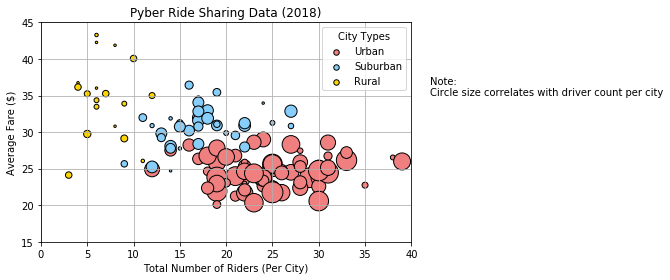

In [111]:
#Plot the Bubble Graph - Urban(Light Coral), Suburbab(Light Sky Blue), Rural(Gold)
plt.scatter(total_rides_urban,average_fare_urban,s=6*total_drivers_urban,c="lightcoral",edgecolor ="black",label = "Urban")
plt.scatter(total_rides_suburban,average_fare_suburban,s=6*total_drivers_suburban,c="lightskyblue",edgecolor ="black",label = "Suburban")
plt.scatter(total_rides_rural,average_fare_rural,s=6*total_drivers_rural,c="gold",edgecolor ="black",label = "Rural")
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Riders (Per City)")
plt.ylabel("Average Fare ($)")
plt.xlim(0,40)
plt.ylim(15,45)
plt.grid('on')
lgnd = plt.legend(loc = 1, title = "City Types", markerscale = 0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.text(42,35,"Note:\nCircle size correlates with driver count per city")
plt.tight_layout()
plt.show()

In [125]:
#groupby the merged df by type
city_ride_type_gb = city_ride_df.groupby('type')
total_fare_percent_type = (city_ride_type_gb['fare'].sum()/city_ride_df['fare'].sum())*100
total_ride_percent_type = (city_ride_type_gb['ride_id'].count()/city_ride_df['fare'].count())*100
total_driver_percent_type = (city_ride_type_gb['driver_count'].sum()/city_ride_df['driver_count'].sum())*100

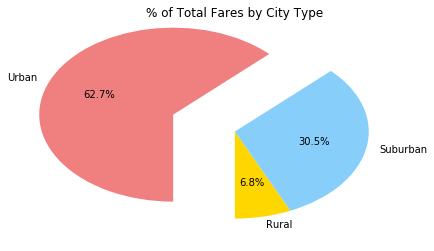

In [121]:
#plot the pie chart --> % of Total Fares by City Type
labels = ['Rural','Suburban','Urban']
colors = ['gold','lightskyblue','lightcoral']
explode = [0,0,0.5]
plt.pie(total_fare_percent_type, labels=labels, colors=colors,explode=explode,autopct='%1.1f%%',startangle= 270)
plt.title("% of Total Fares by City Type")
plt.show()

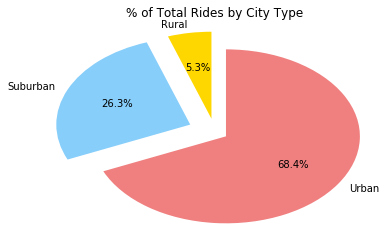

In [147]:
#plot the pie chart --> % of Total Rides by City Type
labels = ['Rural','Suburban','Urban']
colors = ['gold','lightskyblue','lightcoral']
explode = [0.15,0.2,0.1]
plt.pie(total_ride_percent_type, labels=labels, colors=colors,explode=explode,autopct='%1.1f%%',startangle= 90)
plt.title("% of Total Rides by City Type")
plt.show()

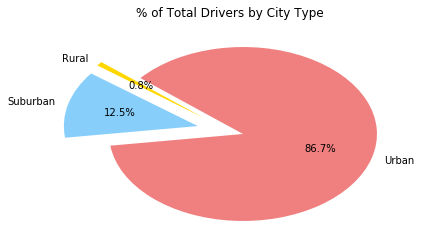

In [139]:
#plot the pie chart --> % of Total Drivers by City Type
labels = ['Rural','Suburban','Urban']
colors = ['gold','lightskyblue','lightcoral']
explode = [0.25,0.25,0.1]
plt.pie(total_driver_percent_type, labels=labels, colors=colors,explode=explode,autopct='%1.1f%%',startangle= 140)
plt.title("% of Total Drivers by City Type")
plt.show()